# 第8部　正規線形モデル

## 1章　連続型の説明変数を1つ持つモデル

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：データの読み込みと図示

In [3]:
# データの読み込み
beer = pd.read_csv('8-1-1-beer.csv')
print(beer.head(n=3))

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0


<AxesSubplot:xlabel='temperature', ylabel='beer'>

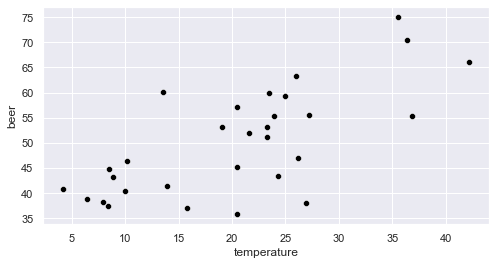

In [4]:
# 図示
sns.scatterplot(x='temperature', y='beer', 
                data=beer, color='black')

### 実装：係数の推定

In [5]:
# データの準備
x = beer['temperature']
y = beer['beer']

In [6]:
# 分散共分散行列
cov_mat = np.cov(x, y, ddof=0)
cov_mat

array([[ 93.963,  71.922],
       [ 71.922, 109.237]])

In [7]:
# 係数の推定

# 平均値
x_bar = np.mean(x)
y_bar = np.mean(y)

# 共分散と分散
cov_xy =  cov_mat[0, 1]
s2_x = cov_mat[0, 0]

# 係数の推定
beta_1 = cov_xy / s2_x
beta_0 = y_bar - beta_1 * x_bar

print('切片      : ', round(beta_0, 3))
print('気温の係数: ', round(beta_1, 3))

切片      :  34.61
気温の係数:  0.765


### 実装：statsmodelsによるモデル化

In [8]:
# モデルの構築
lm_model = smf.ols(formula='beer ~ temperature', 
                   data=beer).fit()

### 実装：推定結果の表示と係数の検定

In [9]:
# 推定結果の表示
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.11e-05
Time:                        15:35:49   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 実装：AICによるモデル選択

In [10]:
# NULLモデル
null_model = smf.ols(formula='beer ~ 1', data=beer).fit()

In [11]:
# NULLモデルのAIC
round(null_model.aic, 3)

227.942

In [12]:
# 説明変数入りのモデルのAIC
round(lm_model.aic, 3)

208.909

In [13]:
# 対数尤度
round(lm_model.llf, 3)

-102.455

In [14]:
# 説明変数の数
lm_model.df_model

1.0

In [15]:
# AIC
round(-2 * (lm_model.llf - (lm_model.df_model + 1)), 3)

208.909

### 実装：単回帰による予測

#### 当てはめ値

In [16]:
# 当てはめ値
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825,
       44.943, 54.511, 52.445, 41.116, 54.664, 49.23 ,
       53.21 , 52.445, 41.04 , 52.598, 45.25 , 61.783,
       55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [17]:
# 参考：当てはめ値を取得する別の方法(書籍には載っていないコードです)
lm_model.fittedvalues

0     50.301
1     53.746
2     42.264
3     55.200
4     46.704
5     37.825
6     44.943
7     54.511
8     52.445
9     41.116
10    54.664
11    49.230
12    53.210
13    52.445
14    41.040
15    52.598
16    45.250
17    61.783
18    55.430
19    50.301
20    42.418
21    50.301
22    51.143
23    40.657
24    66.911
25    52.904
26    62.854
27    41.423
28    62.472
29    39.509
dtype: float64

#### 気温が0度のときの予測値

In [18]:
# 予測
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.61
dtype: float64

In [19]:
# 気温0どの時の予測値は切片に等しい
lm_model.params

Intercept      34.610
temperature     0.765
dtype: float64

#### 気温が20度のときの予測値

In [20]:
# 予測
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.919
dtype: float64

In [21]:
# predict関数を使わないで予測
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

round(beta0 + beta1 * temperature, 3)

49.919

### 実装：信頼区間・予測区間

In [22]:
# 当てはめ結果の信頼区間と予測区間を得る
pred_interval = lm_model.get_prediction(
    pd.DataFrame({'temperature':[20]}))
pred_frame = pred_interval.summary_frame(alpha=0.05)
print(pred_frame)

     mean  mean_se  mean_ci_lower  mean_ci_upper  \
0  49.919    1.392         47.067          52.77   

   obs_ci_lower  obs_ci_upper  
0        34.053        65.785  


### 実装：seabornによる回帰直線の図示

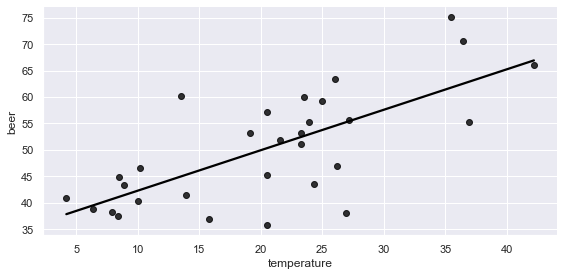

In [23]:
sns.lmplot(x='temperature', y='beer', data=beer,
           scatter_kws={'color': 'black'},
           line_kws   ={'color': 'black'},
           ci=None, height=4, aspect=2)

<AxesSubplot:xlabel='temperature', ylabel='beer'>

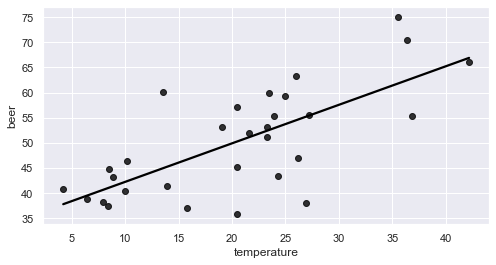

In [24]:
# 参考：axis-level関数(書籍には載っていないコードです)
sns.regplot(x='temperature', y='beer', data=beer,
           scatter_kws={'color': 'black'},
           line_kws   ={'color': 'black'},
           ci=None)

### 実装：信頼区間と予測区間の図示

In [25]:
# 当てはめ結果の信頼区間と予測区間を得る
pred_all = lm_model.get_prediction()
pred_frame_all = pred_all.summary_frame(alpha=0.05)

In [26]:
# 説明変数を付け加える
pred_graph = pd.concat(
    [beer.temperature, pred_frame_all], axis = 1)

# 図示のためにソートする
pred_graph = pred_graph.sort_values("temperature")

In [27]:
# 参考：グラフ描画用のデータにおける、最初の3行(書籍には載っていないコードです)
pred_graph.head(3)

,temperature,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
5,4.2,37.825,2.703,32.288,43.362,21.264,54.386
29,6.4,39.509,2.438,34.515,44.503,23.122,55.896
23,7.9,40.657,2.264,36.019,45.296,24.375,56.940


<AxesSubplot:xlabel='temperature', ylabel='beer'>

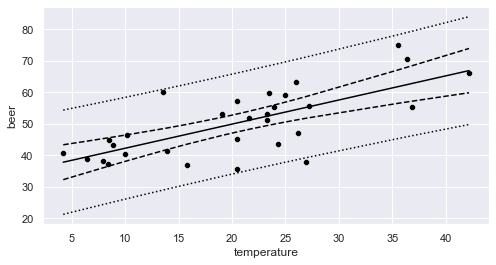

In [28]:
# 散布図
sns.scatterplot(x='temperature', y='beer', 
                data=beer, color='black')

# 回帰直線
sns.lineplot(x='temperature', y='mean', 
             data=pred_graph, color='black')

# 信頼区間
sns.lineplot(x='temperature', y='mean_ci_lower', 
             data=pred_graph, color='black', 
             linestyle='dashed')
sns.lineplot(x='temperature', y='mean_ci_upper', 
             data=pred_graph, color='black', 
             linestyle='dashed')

# 予測区間
sns.lineplot(x='temperature', y='obs_ci_lower', 
             data=pred_graph, color='black', 
             linestyle='dotted')
sns.lineplot(x='temperature', y='obs_ci_upper', 
             data=pred_graph, color='black', 
             linestyle='dotted')